# Trends in Income, Body Mass and Calorie Consumption
By Emily Aquin
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

On the website www.gapminder.org, there are two datasets. The Gapminder World datasets are described as older by the website, while the Gapminder Tools are described as new. All of my chosen datasets are from Gapminder Tools.

The first data set is Income per Person (GDP/capita, PPP$ inflation adjusted). It is the Gross Domestic Product (GDP) per person, adjusted for differences in purchasing power. The numbers are in international dollars, and fixed to 2011 prices. The source is Gapmind, based on World Bank, A. Maddison, M. Lindgren, IMF and more (https://www.gapminder.org/data/documentation/gd001/).

The next dataset is food supply, in kilocalories/person, per day (http://www.fao.org/faostat/en/#data ).

Finally, I chose the Body Mass Index (BMI) datasets from Gapminder Tools, for men and women. They are counted in kilogram per square meter. Also noted, the mean is calculated as if each country has the same age composition as the world population. The sourcelink is https://imperial.ac.uk/school-public-health/epidemiology-and-biostatistics/.

From these datasets, I will compare if the prosperity of a country tends to influence a higher calorie consumption. Also, I will look at how BMI and caloric consumption have changed over time, for both men and women.

The independent variables include:
<ul>
    <li>Years</li>
    <li>Countries</li>
</ul>

The dependent variables include: 
<ul>
    <li>Gross Domestic Product per person, in international dollars </li>
    <li>Kilocalories per person, per day</li>
    <li>Body Mass Index (BMI) for men</li>
    <li>Body Mass Index (BMI) for women</li>
</ul>

In [1]:
#import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

food_consump = pd.read_csv('CSVdata/food_supply_kilocalories_per_person_and_day.csv')
income = pd.read_csv('CSVdata/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
BMI_men = pd.read_csv('CSVdata/body_mass_index_bmi_men_kgperm2.csv')
BMI_women = pd.read_csv('CSVdata/body_mass_index_bmi_women_kgperm2.csv')
    

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Looking at the first few rows of each dataset, and looking at the information, provides an idea of what cleaning may be necessary. The data does not have much missing data, but years can be trimmed to match. Also, the dataframes can be pivoted so countries are the main index.

In [2]:
food_consump.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,3000.0,2920.0,2700.0,2950.0,2960.0,2740.0,2970.0,2920.0,2940.0,...,1970.0,1950.0,1970,2050,2040,2080,2100,2110,2100,2090
1,Albania,2220.0,2240.0,2160.0,2270.0,2250.0,2250.0,2260.0,2340.0,2400.0,...,2790.0,2870.0,2860,2860,2950,2990,3080,3130,3180,3190
2,Algeria,1620.0,1570.0,1530.0,1540.0,1590.0,1570.0,1650.0,1710.0,1710.0,...,2990.0,2960.0,3050,3040,3050,3110,3140,3220,3270,3300
3,Angola,1800.0,1820.0,1850.0,1860.0,1880.0,1890.0,1920.0,1860.0,1950.0,...,2030.0,2080.0,2120,2170,2250,2300,2350,2410,2380,2470
4,Antigua and Barbuda,2010.0,2190.0,2050.0,2130.0,2220.0,2170.0,1960.0,2010.0,2060.0,...,2110.0,2330.0,2330,2410,2380,2320,2320,2370,2290,2420


In [3]:
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [4]:
BMI_men.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.5,21.5,21.4,21.4,21.4,21.4,21.4,21.4,21.3,...,20.8,20.7,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6
1,Albania,25.2,25.2,25.3,25.3,25.3,25.3,25.3,25.3,25.3,...,25.5,25.6,25.7,25.8,25.9,26.0,26.1,26.2,26.3,26.4
2,Algeria,22.3,22.4,22.4,22.5,22.6,22.7,22.8,22.8,22.9,...,23.7,23.8,23.9,23.9,24.1,24.2,24.3,24.4,24.5,24.6
3,Andorra,25.7,25.7,25.8,25.8,25.8,25.9,25.9,25.9,26.0,...,26.8,26.8,26.9,27.0,27.1,27.2,27.3,27.4,27.5,27.6
4,Angola,20.9,20.9,20.9,20.9,20.9,20.9,21.0,21.0,21.0,...,21.3,21.4,21.4,21.5,21.6,21.7,21.8,21.9,22.1,22.3


In [5]:
BMI_women.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,20.4,20.5,20.5,20.6,20.6,20.6,20.7,20.7,20.7,...,20.6,20.6,20.6,20.6,20.7,20.8,20.8,20.9,21.0,21.1
1,Albania,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,...,25.1,25.1,25.2,25.3,25.3,25.4,25.5,25.5,25.6,25.7
2,Algeria,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,...,25.4,25.5,25.6,25.7,25.8,25.9,26.0,26.1,26.3,26.4
3,Andorra,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.8,...,26.1,26.1,26.1,26.2,26.2,26.3,26.3,26.4,26.4,26.4
4,Angola,20.1,20.1,20.2,20.3,20.3,20.4,20.5,20.6,20.7,...,21.8,21.9,22.1,22.3,22.4,22.6,22.8,23.0,23.3,23.5


In [6]:
food_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 54 columns):
country    168 non-null object
1961       141 non-null float64
1962       141 non-null float64
1963       141 non-null float64
1964       141 non-null float64
1965       141 non-null float64
1966       141 non-null float64
1967       141 non-null float64
1968       141 non-null float64
1969       141 non-null float64
1970       141 non-null float64
1971       141 non-null float64
1972       141 non-null float64
1973       141 non-null float64
1974       141 non-null float64
1975       141 non-null float64
1976       141 non-null float64
1977       141 non-null float64
1978       141 non-null float64
1979       141 non-null float64
1980       141 non-null float64
1981       141 non-null float64
1982       141 non-null float64
1983       141 non-null float64
1984       141 non-null float64
1985       141 non-null float64
1986       141 non-null float64
1987       141 non-null float64


In [7]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [8]:
BMI_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
country    189 non-null object
1980       189 non-null float64
1981       189 non-null float64
1982       189 non-null float64
1983       189 non-null float64
1984       189 non-null float64
1985       189 non-null float64
1986       189 non-null float64
1987       189 non-null float64
1988       189 non-null float64
1989       189 non-null float64
1990       189 non-null float64
1991       189 non-null float64
1992       189 non-null float64
1993       189 non-null float64
1994       189 non-null float64
1995       189 non-null float64
1996       189 non-null float64
1997       189 non-null float64
1998       189 non-null float64
1999       189 non-null float64
2000       189 non-null float64
2001       189 non-null float64
2002       189 non-null float64
2003       189 non-null float64
2004       189 non-null float64
2005       189 non-null float64
2006       189 non-null float64


In [9]:
BMI_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
country    189 non-null object
1980       189 non-null float64
1981       189 non-null float64
1982       189 non-null float64
1983       189 non-null float64
1984       189 non-null float64
1985       189 non-null float64
1986       189 non-null float64
1987       189 non-null float64
1988       189 non-null float64
1989       189 non-null float64
1990       189 non-null float64
1991       189 non-null float64
1992       189 non-null float64
1993       189 non-null float64
1994       189 non-null float64
1995       189 non-null float64
1996       189 non-null float64
1997       189 non-null float64
1998       189 non-null float64
1999       189 non-null float64
2000       189 non-null float64
2001       189 non-null float64
2002       189 non-null float64
2003       189 non-null float64
2004       189 non-null float64
2005       189 non-null float64
2006       189 non-null float64


### Data Cleaning 

In [10]:
sum(BMI_men.duplicated())

0

In [11]:
sum(BMI_women.duplicated())

0

In [12]:
sum(income.duplicated())

0

In [13]:
sum(food_consump.duplicated())

0

There appears to be no duplicate data.

In the food consumption (caloric intake) dataset, some of the years are integers instead of floats. I changed them to floats. The BMI datasets only represent the years from 1980-2008. The income and food consumption datasets should be trimmed to match these years. 

In [14]:
#change all the years in food consumption into floats

food_consump_years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

for x in food_consump_years:
    food_consump[x] = food_consump[x].astype(float)

In [15]:
#confirm those 2006-2013 in food consumption are now also floats
food_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 54 columns):
country    168 non-null object
1961       141 non-null float64
1962       141 non-null float64
1963       141 non-null float64
1964       141 non-null float64
1965       141 non-null float64
1966       141 non-null float64
1967       141 non-null float64
1968       141 non-null float64
1969       141 non-null float64
1970       141 non-null float64
1971       141 non-null float64
1972       141 non-null float64
1973       141 non-null float64
1974       141 non-null float64
1975       141 non-null float64
1976       141 non-null float64
1977       141 non-null float64
1978       141 non-null float64
1979       141 non-null float64
1980       141 non-null float64
1981       141 non-null float64
1982       141 non-null float64
1983       141 non-null float64
1984       141 non-null float64
1985       141 non-null float64
1986       141 non-null float64
1987       141 non-null float64


In [16]:
#remove years before 1980 and beyond 2008 in the food consumption dataset, to match the other datasets
food_consump_years = food_consump.copy()
food_consump_years = food_consump_years.iloc[:, np.r_[0, 20:49]]
food_consump_years.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,2480.0,2480.0,2480.0,2520.0,2450.0,2400.0,2400.0,2730.0,2520.0,...,1850.0,1790.0,1740.0,1830.0,1890.0,1970.0,1950.0,1970.0,2050.0,2040.0
1,Albania,2600.0,2680.0,2660.0,2800.0,2720.0,2570.0,2690.0,2500.0,2590.0,...,2800.0,2730.0,2800.0,2860.0,2770.0,2790.0,2870.0,2860.0,2860.0,2950.0
2,Algeria,2570.0,2600.0,2570.0,2550.0,2500.0,2610.0,2630.0,2630.0,2700.0,...,2840.0,2810.0,2890.0,2930.0,2970.0,2990.0,2960.0,3050.0,3040.0,3050.0
3,Angola,1970.0,1890.0,1760.0,1730.0,1670.0,1690.0,1640.0,1630.0,1610.0,...,1810.0,1790.0,1830.0,1920.0,1980.0,2030.0,2080.0,2120.0,2170.0,2250.0
4,Antigua and Barbuda,1970.0,2050.0,1950.0,2020.0,2250.0,2190.0,2210.0,2270.0,2360.0,...,2160.0,2150.0,2090.0,2070.0,2070.0,2110.0,2330.0,2330.0,2410.0,2380.0


In [17]:
#remove years before 1980 and beyond 2008 in the income data set, since 2008 is the final year in the BMI datasets
income_reduced_years = income.copy()
income_reduced_years = income.iloc[:, np.r_[0, 181:210]]

income_reduced_years.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,1170,1300,1410,1470,1440,1400,1500,1240,1120,...,982,972,871,1060,1100,1060,1140,1160,1290,1300
1,Albania,4390,4400,4410,4430,4440,4450,4470,4490,4510,...,5100,5470,5960,6230,6620,7020,7460,7920,8450,9150
2,Algeria,10300,10300,10600,10800,11100,11200,10800,10500,10000,...,9970,10200,10400,10800,11500,11800,12300,12300,12600,12700
3,Andorra,32100,30800,29900,29100,28400,27800,27600,27900,28200,...,31900,31700,31800,31900,34500,36300,39800,42700,43400,41400
4,Angola,4590,4250,4110,4140,4240,4260,4290,4480,4620,...,3510,3510,3540,3180,3240,3460,3950,4600,5440,5980


## Melt Dataframes
Using melt will unpivot the dataframes, so they can be more easily grouped by country.

In [18]:
#melt "income" dataframe
year = pd.Series(range(1980,2009)).astype(str)
income_reduced_years_df2 = pd.melt(income_reduced_years, id_vars=['country'], value_vars = year, var_name='year',value_name='income')
income_reduced_years_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 3 columns):
country    5597 non-null object
year       5597 non-null object
income     5597 non-null int64
dtypes: int64(1), object(2)
memory usage: 131.3+ KB


In [19]:
#melt "food consumption" dataframe
year = pd.Series(range(1980,2009)).astype(str)
food_consump_df2 = pd.melt(food_consump_years, id_vars=['country'], value_vars = year, var_name='year',value_name='calories')
food_consump_df2.head()

,country,year,calories
0,Afghanistan,1980,2480.0
1,Albania,1980,2600.0
2,Algeria,1980,2570.0
3,Angola,1980,1970.0
4,Antigua and Barbuda,1980,1970.0


In [20]:
#melt men's BMI dataframe
year = pd.Series(range(1980,2009)).astype(str)
BMI_men_df=pd.melt(BMI_men, id_vars=['country'], value_vars = year, var_name='year', value_name='BMI')
BMI_men_df.head()

,country,year,BMI
0,Afghanistan,1980,21.5
1,Albania,1980,25.2
2,Algeria,1980,22.3
3,Andorra,1980,25.7
4,Angola,1980,20.9


In [21]:
#melt women's BMI dataframe
year = pd.Series(range(1980,2009)).astype(str)
BMI_women_df2 = pd.melt(BMI_women,id_vars=['country'], value_vars = year, var_name='year',value_name='BMI')
BMI_women_df2.head()

,country,year,BMI
0,Afghanistan,1980,20.4
1,Albania,1980,25.2
2,Algeria,1980,23.7
3,Andorra,1980,25.7
4,Angola,1980,20.1


In [22]:
#check the functionality of the melted dataframes
food_consump_df2.groupby('country').mean()

,calories
country,
Afghanistan,2117.931034
Albania,2729.655172
Algeria,2783.448276
Angola,1797.931034
Antigua and Barbuda,2232.413793
Argentina,3100.000000
Armenia,2398.235294
Australia,3091.724138
Austria,3538.620690


## Merge Datasets

Finally, I merged the food consumption and income dataframes together. I also merged the BMI data with caloric intake (food consumption). I chose several representative countries from around the world, for closer analysis. Those include the United States, Canada, India, China, France and Chad.

In [23]:
merged_food_income= food_consump_df2.merge(income_reduced_years_df2, left_on = ['country','year'], right_on = ['country','year'], how='outer')
merged_food_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5597 entries, 0 to 5596
Data columns (total 4 columns):
country     5597 non-null object
year        5597 non-null object
calories    4503 non-null float64
income      5597 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 218.6+ KB


In [24]:
merged_food_income.head()

,country,year,calories,income
0,Afghanistan,1980,2480.0,1170
1,Albania,1980,2600.0,4390
2,Algeria,1980,2570.0,10300
3,Angola,1980,1970.0,4590
4,Antigua and Barbuda,1980,1970.0,7850


In [25]:
#I chose several representative countries from around the world, for closer analysis. 
#Those include the United States, Canada, India, China, France and Chad.
income_calories = merged_food_income.loc[merged_food_income['country'].isin(['United States', 'China', 'France','India', 'Chad', 'Canada'])]
income_calories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 26 to 4863
Data columns (total 4 columns):
country     174 non-null object
year        174 non-null object
calories    174 non-null float64
income      174 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [26]:
#merged the BMI for men dataset to the caloric dataset 
merged_food_men= food_consump_df2.merge(BMI_men_df, left_on = ['country', 'year'], right_on=['country', 'year'], how='inner')

In [27]:
merged_food_men.head()

,country,year,calories,BMI
0,Afghanistan,1980,2480.0,21.5
1,Albania,1980,2600.0,25.2
2,Algeria,1980,2570.0,22.3
3,Angola,1980,1970.0,20.9
4,Antigua and Barbuda,1980,1970.0,23.3


In [28]:
#reduced the countries to 6
men_BMI_clean = merged_food_men.loc[merged_food_men['country'].isin(['United States', 'China', 'France','India', 'Chad', 'Canada'])]
men_BMI_clean.head(10)

,country,year,calories,BMI
26,Canada,1980,2950.0,25.2
29,Chad,1980,1640.0,20.2
31,China,1980,2150.0,21.6
51,France,1980,3380.0,24.7
67,India,1980,1990.0,21.1
159,United States,1980,3180.0,25.5
194,Canada,1981,2900.0,25.3
197,Chad,1981,1620.0,20.2
199,China,1981,2160.0,21.6
219,France,1981,3420.0,24.7


In [29]:
#merged the BMI for women dataset to the caloric dataset 
merged_food_women= food_consump_df2.merge(BMI_women_df2, left_on = ['country','year'], right_on=['country', 'year'], how='outer')

In [30]:
merged_food_women.head()

,country,year,calories,BMI
0,Afghanistan,1980,2480.0,20.4
1,Albania,1980,2600.0,25.2
2,Algeria,1980,2570.0,23.7
3,Angola,1980,1970.0,20.1
4,Antigua and Barbuda,1980,1970.0,24.2


In [31]:
#reduced the countries to 6
women_BMI_clean = merged_food_women.loc[merged_food_women['country'].isin(['United States', 'China', 'France','India', 'Chad', 'Canada'])]
women_BMI_clean.head(10)

,country,year,calories,BMI
26,Canada,1980,2950.0,24.1
29,Chad,1980,1640.0,19.2
31,China,1980,2150.0,21.9
51,France,1980,3380.0,24.1
67,India,1980,1990.0,20.5
159,United States,1980,3180.0,25.0
194,Canada,1981,2900.0,24.2
197,Chad,1981,1620.0,19.2
199,China,1981,2160.0,21.9
219,France,1981,3420.0,24.2


<a id='eda'></a>
## Exploratory Data Analysis


### Caloric Intake Compared to Income
First, I looked to see how strongly correlated income is to calorie consumption.

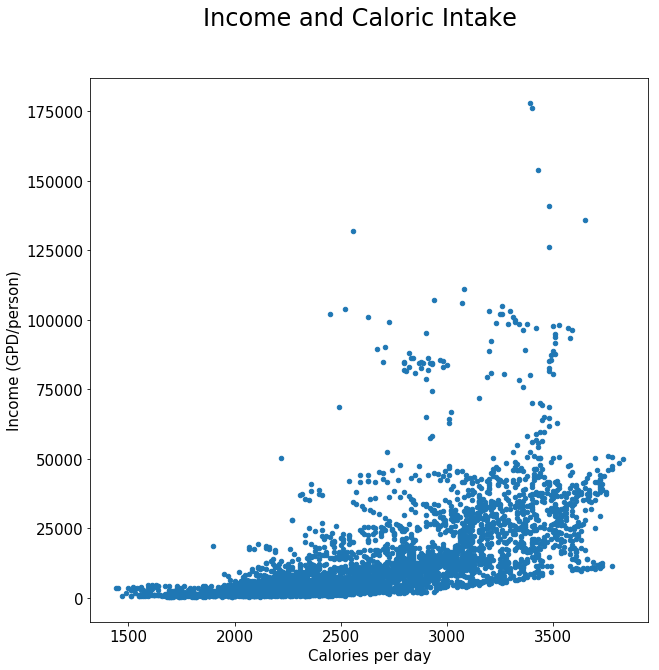

In [32]:
merged_food_income.plot(x='calories', y='income', kind='scatter', figsize=(10,10))
plt.suptitle('Income and Caloric Intake', fontsize=24)
plt.xlabel('Calories per day', fontsize=15)
plt.ylabel('Income (GPD/person)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [33]:
#the correlation between calories consume and income
merged_food_income.corr()

,calories,income
calories,1.000000,0.598265
income,0.598265,1.000000


There is a moderate positive linear relationship between calories consumed and income, per country. I expected a stronger correlation. However, the relationship would have quite a few factors. The cost of food, shaped by the cost efficiency of getting the food from farm to table, would vary widely for each country. This means that some countries would pay much less for low calorie, highly nutritious foods, such as fruits and vegetables. Also, sometimes higher calorie foods are cheaper than fruits and vegetables, which promote consuming fewer daily calories and a healthy BMI when incorporated into diet. This topic would be fascinating to delve into on a country by country basis.

In [34]:
#I chose 6 countries from around the world to look at the relationship of income and calorie consumption more closely
#sort data frame by caloric intake
ave_year_df = income_calories.groupby('country', as_index=False).mean().sort_values('calories')
ave_year_df

,country,calories,income
1,Chad,1825.862069,1180.241379
4,India,2269.310345,2145.172414
2,China,2605.862069,3026.206897
0,Canada,3234.482759,33310.344828
3,France,3527.241379,30934.482759
5,United States,3554.482759,39968.965517


In [35]:
ave_year_df.corr()

,calories,income
calories,1.000000,0.931624
income,0.931624,1.000000


These 6 countries have a strong positive correlation between caloric consumption and income, 0.93. 

These barcharts illustrate that there is a tendency for caloric intake to increase when income increases, in these 6 countries. France has a slight decrease in income compared to Canada and the United States, but it also has a higher average caloric intake than Canada, and almost the same as the United States. 
The countries with less income, Chad, India and China, have lower mean caloric intake.

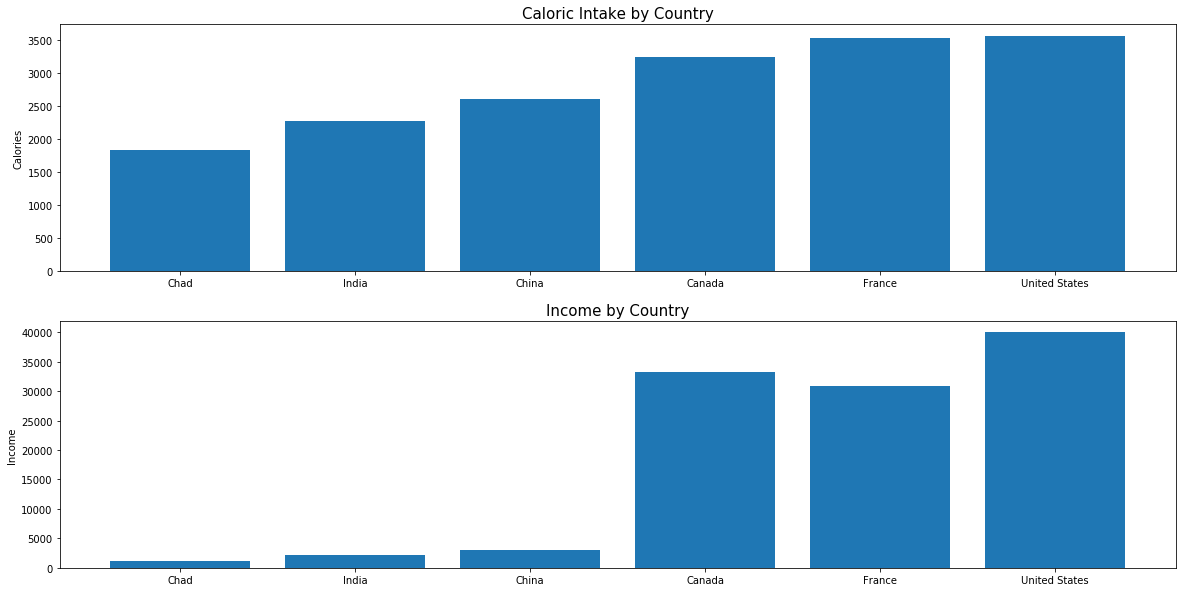

In [36]:
#create barchart that illustrates calories and income, per country
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

ax1.bar(ave_year_df['country'], ave_year_df['calories'])
ax2.bar(ave_year_df['country'], ave_year_df['income'])

ax1.set_ylabel('Calories')
ax1.set_title('Caloric Intake by Country', fontsize= 15)

ax2.set_ylabel('Income')
ax2.set_title('Income by Country', fontsize=15);

### Changes in BMI Over Time

The second question is regarding the change in calorie intake from 1980 to 2008, and whether the BMI of men and women in each country reflects the same trends.

While there are some small decreases in caloric intake (for example, India in 1990 and Chad in 1993), the caloric intake has been increasing in all 6 countries.

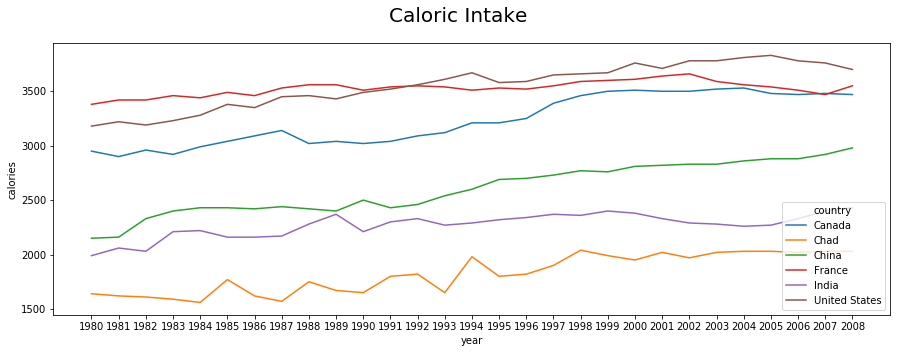

In [37]:
plt.figure(figsize=(15,5))
plt.suptitle('Caloric Intake', fontsize=20)
sns.lineplot(data=men_BMI_clean, x='year', y='calories', hue='country');

There is a very strong positive correlation for both men (0.93) and women (0.94) between the average caloric intake and the average BMI, for the 6 countries listed.

In [38]:
men_BMI_clean.corr()

,calories,BMI
calories,1.000000,0.930959
BMI,0.930959,1.000000


In [39]:
women_BMI_clean.corr()

,calories,BMI
calories,1.000000,0.938343
BMI,0.938343,1.000000


As indicated by the strong correlation between caloric intake and BMI, most of 6 of the countries have increased in average BMI from 1980 to 2008, for both men and women. India has remained the most constant.

In [40]:
men_BMI_clean.query('country == "India"')

,country,year,calories,BMI
67,India,1980,1990.0,21.1
235,India,1981,2060.0,21.1
403,India,1982,2030.0,21.0
571,India,1983,2210.0,21.0
739,India,1984,2220.0,20.9
907,India,1985,2160.0,20.9
1075,India,1986,2160.0,20.8
1243,India,1987,2170.0,20.8
1411,India,1988,2280.0,20.8
1579,India,1989,2370.0,20.7


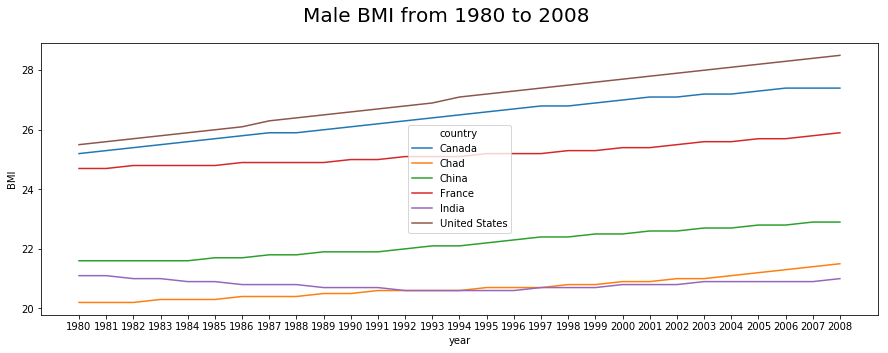

In [41]:
plt.figure(figsize=(15,5))
plt.suptitle('Male BMI from 1980 to 2008', fontsize=20)
sns.lineplot(data=men_BMI_clean, x='year', y='BMI', hue='country');

The BMI for women has also increased for most of the countries in this analysis. France has remained mostly constant, with a BMI of 24 for all years.

In [42]:
women_BMI_clean.query('country == "France"')

,country,year,calories,BMI
51,France,1980,3380.0,24.1
219,France,1981,3420.0,24.2
387,France,1982,3420.0,24.2
555,France,1983,3460.0,24.2
723,France,1984,3440.0,24.2
891,France,1985,3490.0,24.3
1059,France,1986,3460.0,24.3
1227,France,1987,3530.0,24.3
1395,France,1988,3560.0,24.3
1563,France,1989,3560.0,24.4


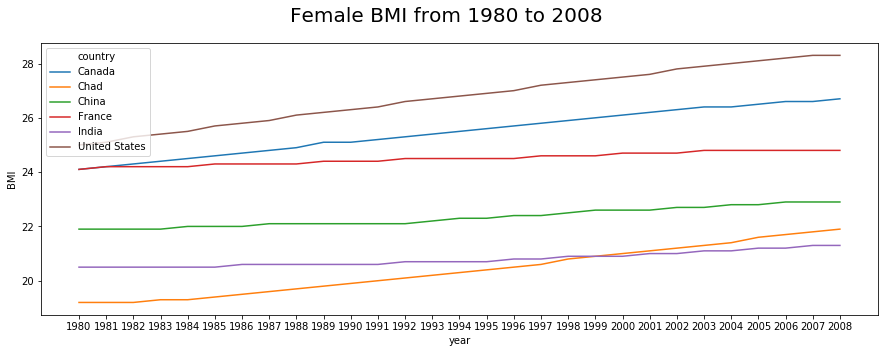

In [43]:
plt.figure(figsize=(15,5))
plt.suptitle('Female BMI from 1980 to 2008', fontsize=20)
sns.lineplot(data=women_BMI_clean, x='year', y='BMI', hue='country');

<a id='conclusions'></a>
## Conclusions
To conclude, the data analysis here has explored the possible connections between income, caloric intake, and body mass in various countries around the world. While the correlation between income and caloric intake is not as strong as one might expect, there is a moderate reflection of wealthier countries consuming more calories. It is also noted that in the the last three decades, caloric intake has been increasing in most of the world, and that is logically reflected in increased body mass indexes for men and women. The factors that contribute to food accessibility and the culture of food around the world are complicated, and cannot be reduced solely to the correlation of income and caloric intake. Causality cannot be shown by the data provided here.